In [1]:
"""
@ Author:         姜楠（小组成员：姜楠、王勃栋、李甜）
@ Create Date:    2021-11-10
@ Requirements:
1, Implmenting the multivariate regression using numpy and pandas without using sk-learn regressor.
2, Implementation should include both gradient descent or ordinary least square with matrix inversion.
3, You are required to train your own model and provide evaluation with RMSE and R².
4, Compare your implementation with Sk-learn regressor.
5, Implementation of t-value and confidence interval for the coefficients gain credits.
"""
import pandas as pd
import numpy as np

car = pd.read_csv("CarPrice_Assignment.csv")
car

,wheelbase,carlength,carwidth,carheight,enginesize,price
0,88.6,168.8,64.1,48.8,130,13495.0
1,88.6,168.8,64.1,48.8,130,16500.0
2,94.5,171.2,65.5,52.4,152,16500.0
3,99.8,176.6,66.2,54.3,109,13950.0
4,99.4,176.6,66.4,54.3,136,17450.0
...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,141,16845.0
201,109.1,188.8,68.8,55.5,141,19045.0
202,109.1,188.8,68.9,55.5,173,21485.0
203,109.1,188.8,68.9,55.5,145,22470.0


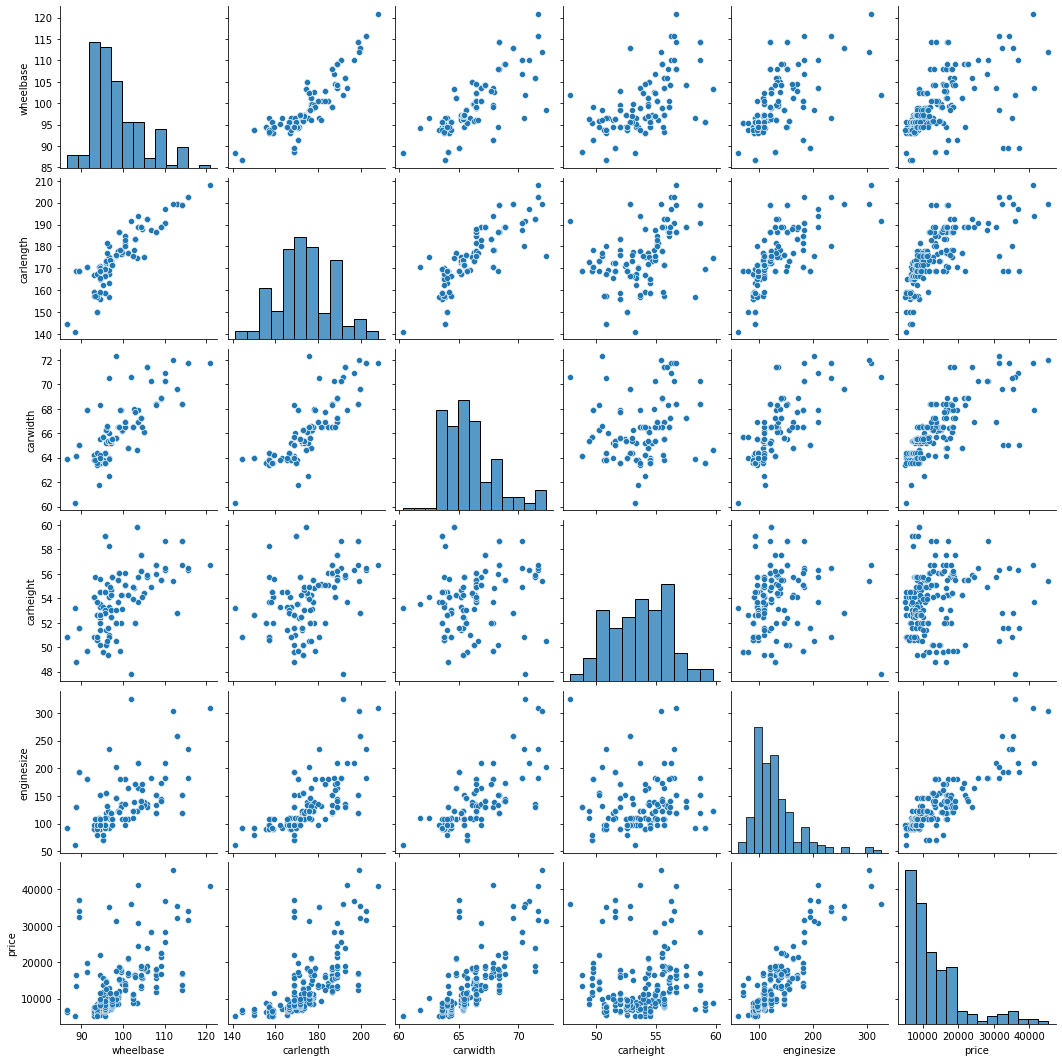

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

# 通过全局的线性图筛选相关度高的字段
import seaborn as sns
sns.pairplot(car)
plt.show()


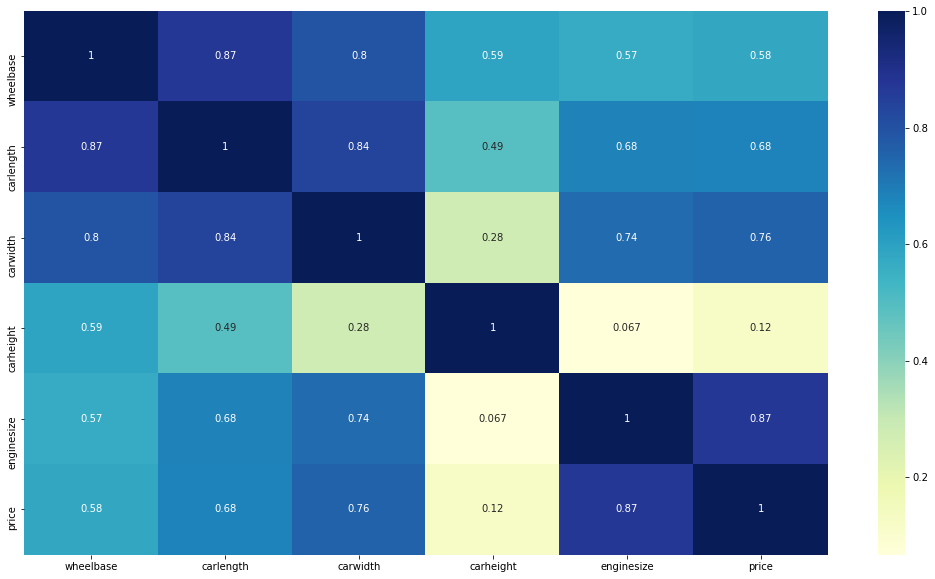

In [126]:
plt.figure(figsize=(18,10))
sns.heatmap(car.corr(),cmap='YlGnBu', annot=True)
plt.show();

In [128]:
# 拆分 X\Y ，去除相关度少的字段信息
x=car.drop(["price","carheight"],axis="columns")
y=car["price"]
x.insert(0,'ones',1)
x

,ones,wheelbase,carlength,carwidth,enginesize
0,1,88.6,168.8,64.1,130
1,1,88.6,168.8,64.1,130
2,1,94.5,171.2,65.5,152
3,1,99.8,176.6,66.2,109
4,1,99.4,176.6,66.4,136
...,...,...,...,...,...
200,1,109.1,188.8,68.9,141
201,1,109.1,188.8,68.8,141
202,1,109.1,188.8,68.9,173
203,1,109.1,188.8,68.9,145


In [182]:
#整理测试集、训练集
# limit=10
limit=5
row = np.size(x,0)-limit
col = np.size(x,1)
x_train=x[:row]
y_train=y[:row]
x_test=x[row:]
y_test=y[row:]

# 设置训练集行数
train_row=np.size(x_train,0)
print(x_train.to_numpy())
print(x_test.to_numpy())
print(y_test.to_numpy())
print(train_row)


[[  1.   88.6 168.8  64.1 130. ]
 [  1.   88.6 168.8  64.1 130. ]
 [  1.   94.5 171.2  65.5 152. ]
 [  1.   99.8 176.6  66.2 109. ]
 [  1.   99.4 176.6  66.4 136. ]
 [  1.   99.8 177.3  66.3 136. ]
 [  1.  105.8 192.7  71.4 136. ]
 [  1.  105.8 192.7  71.4 136. ]
 [  1.  105.8 192.7  71.4 131. ]
 [  1.   99.5 178.2  67.9 131. ]
 [  1.  101.2 176.8  64.8 108. ]
 [  1.  101.2 176.8  64.8 108. ]
 [  1.  101.2 176.8  64.8 164. ]
 [  1.  101.2 176.8  64.8 164. ]
 [  1.  103.5 189.   66.9 164. ]
 [  1.  103.5 189.   66.9 209. ]
 [  1.  103.5 193.8  67.9 209. ]
 [  1.  110.  197.   70.9 209. ]
 [  1.   88.4 141.1  60.3  61. ]
 [  1.   94.5 155.9  63.6  90. ]
 [  1.   94.5 158.8  63.6  90. ]
 [  1.   93.7 157.3  63.8  90. ]
 [  1.   93.7 157.3  63.8  90. ]
 [  1.   93.7 157.3  63.8  98. ]
 [  1.   93.7 157.3  63.8  90. ]
 [  1.   93.7 157.3  63.8  90. ]
 [  1.   93.7 157.3  63.8  90. ]
 [  1.   93.7 157.3  63.8  98. ]
 [  1.  103.3 174.6  64.6 122. ]
 [  1.   95.9 173.2  66.3 156. ]
 [  1.   8

In [183]:
#均方误差代价函数
def costFun(X,Y,W):
    m=train_row
    i=np.power(np.dot(X,W.T)-Y,2)
    return np.sum(i)/(2*m)

# 使用to_numpy()会去掉索引，不加括号就会带索引
# 整理初始化数据
X=np.mat(x_train.to_numpy())
Y=np.mat(y_train.to_numpy()).T
W=np.mat(np.zeros(col))

# row
# W
# W[0,1]

# sum_w
# i=0
# s=(X[i]*W.T[i]+B[i]-y)**2
# W.shape
# W.shape
# W = np.zeros((col,1));
# W=y_train;
Q=costFun(X,Y,W)
Q

117575851.23920973

In [184]:
# 梯度下降

def gradientDescent(X,Y,W,num):
#     使用行数
    m=train_row
    alpha=0.000001
    temp = np.mat(np.zeros(W.shape))
    cost = np.zeros(num)
    wNums = int(W.shape[1])
    for i in range(num):
        d=np.dot(X,W.T)-Y
        for j in range(wNums):
            a=np.multiply(d,X[:,j])
            temp[0,j]=W[0,j]-(alpha*np.sum(a)/m)
        W=temp
#         print(W)
        cost[i] = costFun(X,Y,W)
    return W,cost

# 迭代次数
iters=3000

# 梯度下降验证
finalW,cost = gradientDescent(X,Y,W,iters)
finalW


matrix([[ -0.53342362, -23.50247283, -21.48681693, -20.74837148,
         163.0292635 ]])

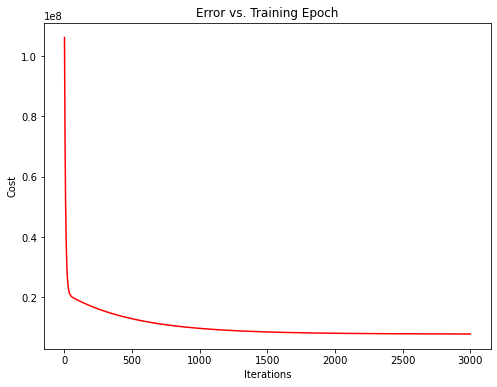

In [185]:
# 损失曲线
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(iters), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('Cost') 
bx.set_title('Error vs. Training Epoch') 
plt.show()

In [186]:
# 通用的预测函数
def predict(X_TEST,W):
    Y_PRIDICT=np.dot(X_TEST,W.T)
    return Y_PRIDICT


In [187]:
# 最小二乘法
def leastSquares(X,Y,W):
#     linalg.inv用于求取逆矩阵
    W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    return W.T
lsFinalW = leastSquares(X,Y,W)
lsFinalW

matrix([[-6.37703915e+04, -1.14047506e+02,  3.83376998e+01,
          9.84544922e+02,  1.31557444e+02]])

In [188]:
# sklearn
from sklearn.linear_model import LinearRegression
jn_clf=LinearRegression(fit_intercept=False)
jn_clf.fit(x_train,y_train)

X_TEST=np.mat(x_test.to_numpy())


# 3种预测方法
p1 = predict(X_TEST,finalW)
print("梯度下降：",p1)

p2 = predict(X_TEST,lsFinalW)
print("最小二乘：",p2)
p3 = jn_clf.predict(x_test)
print("sklearn：",p3)
Y_TEST=np.mat(y_test.to_numpy()).T
print("真实数据：",Y_TEST)


梯度下降： [[14936.19911363]
 [14938.27395078]
 [20153.13554575]
 [15588.31616764]
 [14936.19911363]]
最小二乘： [[17409.9281595 ]
 [17311.47366727]
 [21619.76638283]
 [17936.15793741]
 [17409.9281595 ]]
sklearn： [17409.92815949 17311.47366726 21619.76638283 17936.15793741
 17409.92815949]
真实数据： [[16845.]
 [19045.]
 [21485.]
 [22470.]
 [22625.]]


In [189]:
# 模型评估
# print("RMSE", np.power(p1-Y_TEST,2))
def rmse(p,Y,fun):
    print("RMSE",fun, np.sqrt(np.sum(np.sum(np.power(p-Y,2))/len(Y))))

def rsquare(p,Y,fun):
    print('R^2',fun,1-(np.sum(np.sum(np.power(p-Y,2))/len(Y))/np.var(Y)))

rmse(p1,Y_TEST,"梯度下降")
rmse(p2,Y_TEST,"最小二乘")
rmse(p3,Y_TEST,"sklearn")

rsquare(p1,Y_TEST,"梯度下降")
rsquare(p2,Y_TEST,"最小二乘")
rsquare(p3,Y_TEST,"sklearn")



RMSE 梯度下降 5074.599768069881
RMSE 最小二乘 3196.7207416261103
RMSE sklearn 7861.551886191431
R^2 梯度下降 -4.1829402064063474
R^2 最小二乘 -1.0567523674923556
R^2 sklearn -11.439106273670015
